In [19]:
using DifferentialEquations
using Plots
pyplot()

Plots.PyPlotBackend()

In [43]:
function two_body_Kuramoto!(du,u,p,t) #微分dy、関数u、パラメータp、変数t
    du[1] = p[2] + p[1]*sin(u[2]-u[1])
    du[2] = p[3] + p[1]*sin(u[1]-u[2])
end

u0 = [0,pi]
tspan = (0.0,100.0)
p = [0.5,2pi,2.2pi]
@time prob = ODEProblem(two_body_Kuramoto!,u0,tspan,p)
@time sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8,saveat=0.1)

  0.000518 seconds (358 allocations: 25.125 KiB)
  2.417889 seconds (2.39 M allocations: 117.356 MiB, 4.36% gc time)


retcode: Success
Interpolation: 1st order linear
t: 1001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮  
  98.9
  99.0
  99.1
  99.2
  99.3
  99.4
  99.5
  99.6
  99.7
  99.8
  99.9
 100.0
u: 1001-element Array{Array{Float64,1},1}:
 [0.0, 3.14159]     
 [0.626695, 3.83437]
 [1.24992, 4.53061] 
 [1.86936, 5.23064] 
 [2.48466, 5.93481] 
 [3.09553, 6.64341] 
 [3.7017, 7.3567]   
 [4.30301, 8.07486] 
 [4.89942, 8.79793] 
 [5.49106, 9.52575] 
 [6.07832, 10.258]  
 [6.66181, 10.9939] 
 [7.24244, 11.7328] 
 ⋮                  
 [650.567, 657.529] 
 [651.227, 658.189] 
 [651.886, 658.849] 
 [652.546, 659.509] 
 [653.206, 660.168] 
 [653.866, 660.828] 
 [654.525, 661.488] 
 [655.185, 662.148] 
 [655.845, 662.807] 
 [656.504, 663.467] 
 [657.164, 664.127] 
 [657.824, 664.787] 

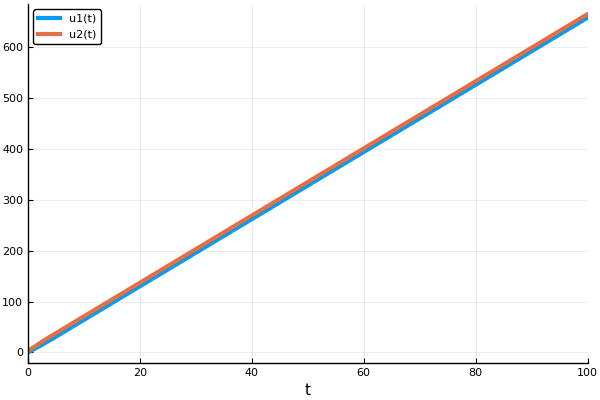

In [44]:
plot(sol)

In [76]:
function N_body_Kuramoto!(du,u,p,t) #微分dy、関数u、パラメータp、変数t
    K = p[1]
    N = Int(p[2])
    omega = p[3:N+2]
    interaction = p[N+3:end]
    Kuramoto_interaction!(u,interaction)
    du .= omega .+ K./N.*interaction
end

function Kuramoto_interaction!(u,interaction)
    for i in 1:length(u)
        interaction[i] = sum(sin.([u[j]-u[i] for j in 1:length(u)]))
    end        
end

function initialize_Kuramoto(K,N)
    u0 = rand(N)*2pi
    omega = 2pi.+ 0.3pi.*(rand(N).-0.5)
    interaction = zeros(Float64,N)
    p = vcat(K,N,omega,interaction)
    return u0,p
end

u0 = [0,pi]
tspan = (0.0,100.0)
p = [1,2,2pi,2.2pi,0,0]
@time prob = ODEProblem(N_body_Kuramoto!,u0,tspan,p)
@time sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8,saveat=0.1)

  0.000453 seconds (394 allocations: 26.906 KiB)
  3.300320 seconds (2.52 M allocations: 123.563 MiB, 12.57% gc time)


retcode: Success
Interpolation: 1st order linear
t: 1001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮  
  98.9
  99.0
  99.1
  99.2
  99.3
  99.4
  99.5
  99.6
  99.7
  99.8
  99.9
 100.0
u: 1001-element Array{Array{Float64,1},1}:
 [0.0, 3.14159]     
 [0.626695, 3.83437]
 [1.24992, 4.53061] 
 [1.86936, 5.23064] 
 [2.48466, 5.93481] 
 [3.09553, 6.64341] 
 [3.7017, 7.3567]   
 [4.30301, 8.07486] 
 [4.89942, 8.79793] 
 [5.49106, 9.52575] 
 [6.07832, 10.258]  
 [6.66181, 10.9939] 
 [7.24244, 11.7328] 
 ⋮                  
 [650.567, 657.529] 
 [651.227, 658.189] 
 [651.886, 658.849] 
 [652.546, 659.509] 
 [653.206, 660.168] 
 [653.866, 660.828] 
 [654.525, 661.488] 
 [655.185, 662.148] 
 [655.845, 662.807] 
 [656.504, 663.467] 
 [657.164, 664.127] 
 [657.824, 664.787] 

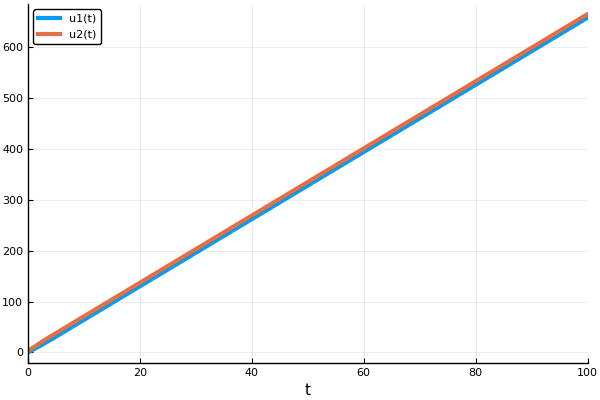

In [77]:
plot(sol)

In [86]:
u0,p = initialize_Kuramoto(0.7,10)
tspan = (0.0,100.0)
@time prob = ODEProblem(N_body_Kuramoto!,u0,tspan,p)
@time sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8,saveat=0.1)

  0.000369 seconds (394 allocations: 26.906 KiB)
  0.002417 seconds (17.47 k allocations: 1.741 MiB)


retcode: Success
Interpolation: 1st order linear
t: 1001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮  
  98.9
  99.0
  99.1
  99.2
  99.3
  99.4
  99.5
  99.6
  99.7
  99.8
  99.9
 100.0
u: 1001-element Array{Array{Float64,1},1}:
 [5.98619, 2.71662, 2.53719, 4.31305, 0.993459, 1.58821, 1.79823, 6.26824, 3.0539, 5.75229]
 [6.61339, 3.30448, 3.12686, 4.93048, 1.6224, 2.21355, 2.39581, 6.88083, 3.6249, 6.38857]  
 [7.24158, 3.89158, 3.71584, 5.54789, 2.25137, 2.8384, 2.99316, 7.49431, 4.19504, 7.02595] 
 [7.87082, 4.4779, 4.30414, 6.1653, 2.88032, 3.4627, 3.59029, 8.10873, 4.76431, 7.66448]   
 [8.50112, 5.06342, 4.89174, 6.78275, 3.50921, 4.08642, 4.18718, 8.72411, 5.33271, 8.3042] 
 [9.13253, 5.64814, 5.47863, 7.40026, 4.13798, 4.7095, 4.78384, 9.34048, 5.90022, 8.94515] 
 [9.76506, 6.23205, 6.06481, 8.01786, 4.76659, 5.33191, 5.38026, 9.95785, 6.46685, 9.58737]
 [10.3987, 6.81514, 6.65028, 8.63561, 5.39497, 5

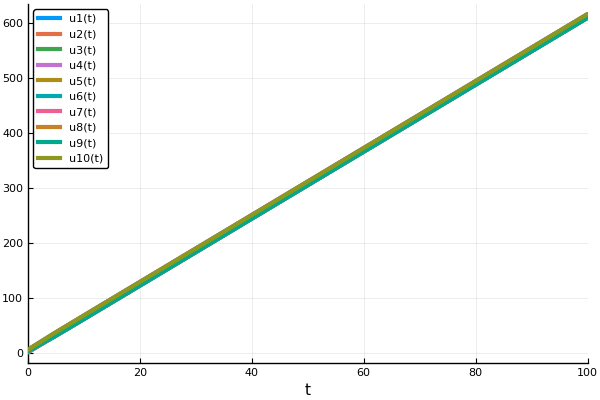

In [87]:
plot(sol)